In [6]:
library(tidyverse)
library(ggplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


ERROR: Error in library(ggplot): there is no package called ‘ggplot’


Let's use the code provided below to generate a dataset representing two populations, each sampled from a Guassian with a specific population mean. Here I am generating only 5 samples

In [48]:
set.seed(110)
data_1 = tibble(measure=rnorm(5, 10, 1))
data_1$site_name <- 'Site 1'
data_2 = tibble(measure=rnorm(5, 12, 1))
data_2$site_name <- 'Site 2'
complete_data = rbind(data_1, data_2)
complete_data

measure,site_name
<dbl>,<chr>
10.29120,Site 1
11.38886,Site 1
10.64901,Site 1
11.47788,Site 1
10.43872,Site 1
12.52232,Site 2
11.95539,Site 2
13.48441,Site 2
10.40899,Site 2


* I compute the mean of the dataset above using the following code:
  * feel free to deconstruct the code to see what each chunk does.


In [49]:
mean(complete_data[complete_data$site_name == "Site 1", ]$measure)
mean(complete_data[complete_data$site_name == "Site 2", ]$measure)

[1] 10.84913

[1] 12.11935

* Use the `tapply` function instead of the code above to compute the means samples from "Site 1" and those from site 2
  * See tapply for help if needed.

In [50]:
# Write your code here
site1_mean <- tapply(complete_data$measure, complete_data$site_name == "Site 1", mean)

In [51]:
site1_mean

FALSE     TRUE 
12.11935 10.84913

The mean for Site 1 is given by TRUE, the mean for Site 2 is given by FALSE.

Q.2 

* Use the bootstrapping-procedure covered in class to assess whether there is a statistically significant difference between the data in `Site 1` and that in `Site 2`.

Make sure you follow the approach discussed in class and which consists of:

1. Selecting an appropriate test statistic
2. Bootstrapping a distribution for the observed statistic under the null hypothesis
3. Desciding whether to accept or reject the null based on the probability of the null
4. provide a p-value to support your decision.


In [52]:
data_1 <- rnorm(5, 10, 1)
data_2 <- rnorm(5, 12, 1)

In [53]:
processOneIteration = function(data_1, data_2){
    
    concat_data = c(data_1, data_2)
    len_concat_data = length(concat_data)
    
    len_data_1 = length(data_1)    
    shuffled_data = sample(concat_data)
    new_data_1 = shuffled_data[1:len_data_1]
    new_data_2 = shuffled_data[(len_data_1+1):len_concat_data]
    mean(new_data_1) - mean(new_data_2)
    
}
processOneIteration(data_1, data_2)

[1] 0.6104817

In [54]:
replicate(5, processOneIteration(data_1, data_2))

[1]  1.4018446  0.5349766  0.9618408 -0.2157611 -0.4497096

In [55]:
mean_under_null = replicate(1000, processOneIteration(data_1, data_2))
mean(mean_under_null)

[1] 0.01436313

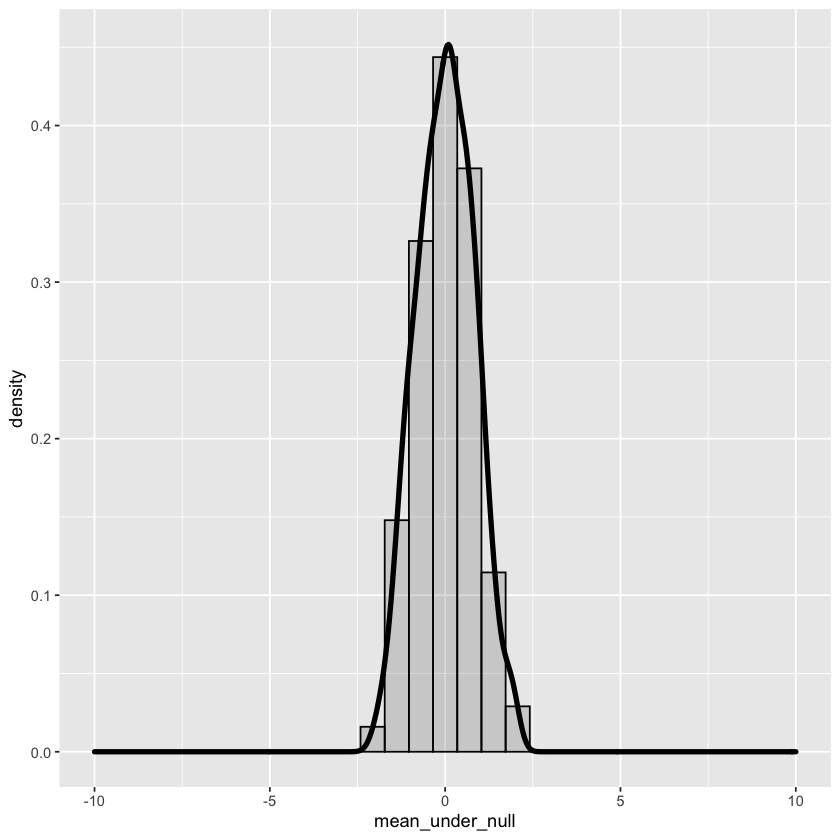

In [60]:
ggplot()+
  geom_histogram(aes(mean_under_null, y=..density..), bins =30, alpha=0.2, color="black") + 
  geom_density(aes(mean_under_null), bw=0.2, size=1.5) + 
  xlim(-10, 10)

In [46]:
observed_value = mean(data_1) - mean(data_2)
observed_value

[1] -2.848024

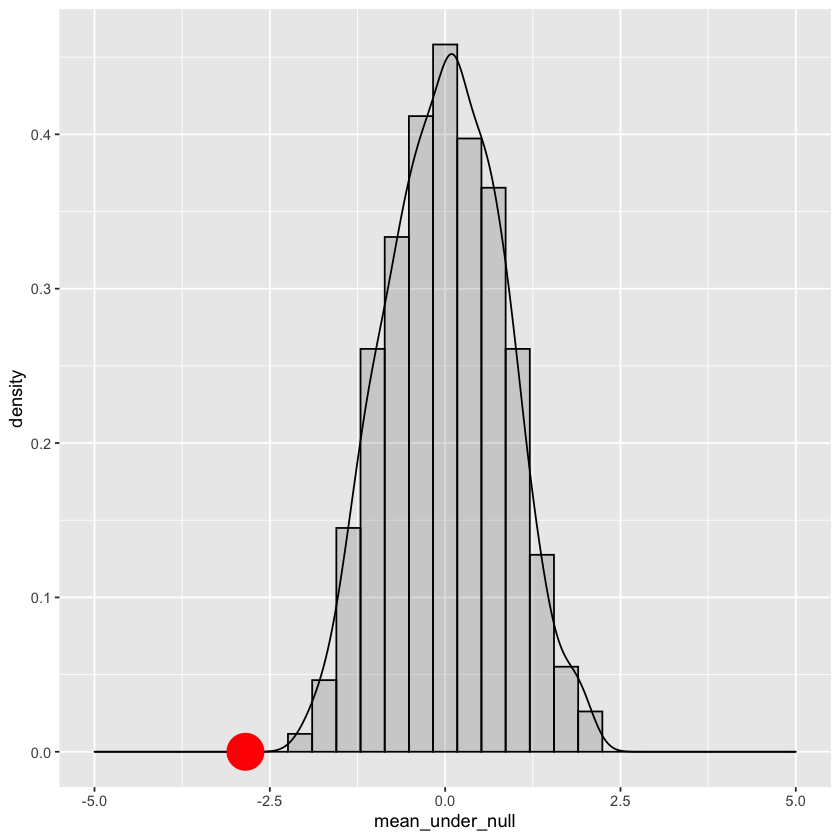

In [59]:
ggplot()+
  geom_histogram(aes(mean_under_null, y=..density..), bins =30, alpha=0.2, color="black") + 
  geom_density(aes(mean_under_null), bw=0.2, size=0.5) + 
  xlim(-5, 5) + 
  geom_point(aes(observed_value, 0), color="red", size=10)

In [41]:
#pvalue
sum(mean_under_null <= observed_value) / length(mean_under_null)

[1] 0.011

Where N = 5, the degrees of freedom equals 4, and alpha is 0.05, the p-value = 0.011 < 2.132. Therefore, the null hypothesis is rejected.

#### Q2.0 

Complete the following by describing the null and the alternative hypotheses we are testing here.


In [8]:
### Write your answer here

#### Q.2.1 

Produce a graph similar the one below (geom_density) display the distributions. If you're using the same seed as mine, your graph will look exactly the same as the one below 

![](https://www.dropbox.com/s/rz5jxm84kk8ac1m/dist.png?dl=1)

In [32]:
# write your code here
set.seed(110)
data_1 = tibble(measure_1=rnorm(40, 10, 1))
data_1$site_name <- 'Site 1'
data_2 = tibble(measure_2=rnorm(40, 13, 1))
data_2$site_name <- 'Site 2'
complete_df <-data.frame(data_1, data_2)
complete_tb <-as_tibble(complete_df)

In [46]:
str(complete_tb)

tibble [40 × 4] (S3: tbl_df/tbl/data.frame)
 $ measure_1  : num [1:40] 10.3 11.4 10.6 11.5 10.4 ...
 $ site_name  : chr [1:40] "Site 1" "Site 1" "Site 1" "Site 1" ...
 $ measure_2  : num [1:40] 12 13.7 13.5 12.3 12 ...
 $ site_name.1: chr [1:40] "Site 2" "Site 2" "Site 2" "Site 2" ...


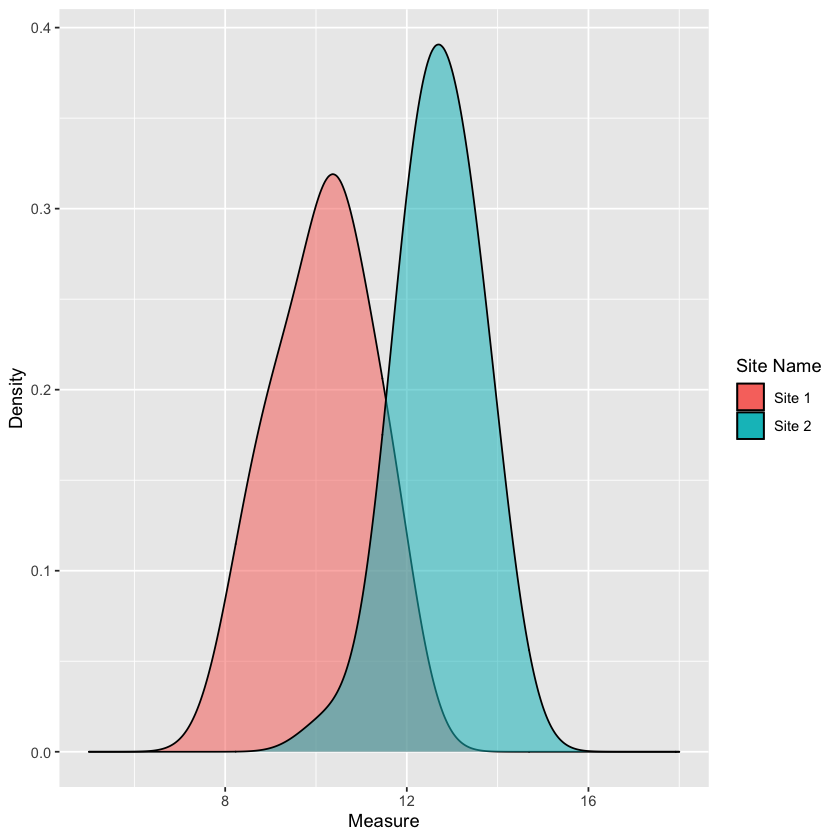

In [13]:
ggplot(complete_tb) +
    geom_density(aes(x = measure_1, alpha = 0.5, fill = "green"), bw = 0.6) +
    geom_density(aes(x = measure_2, alpha = 0.5, fill = "red"), bw = 0.6) +
    xlim(5, 18) +
    labs(x = "Measure", y = "Density") +
    scale_fill_discrete(name = "Site Name", labels = c("Site 1", "Site 2")) +
    guides(alpha="none")

Q2.2 Select a proper test statistic and produce a distribution of the statistic under the null hypothesis. Plot the data as both a histogram and density curves. Your graph may look like this.

![](https://www.dropbox.com/s/3jarqg9swneai0r/mean_under_null.png?dl=1)

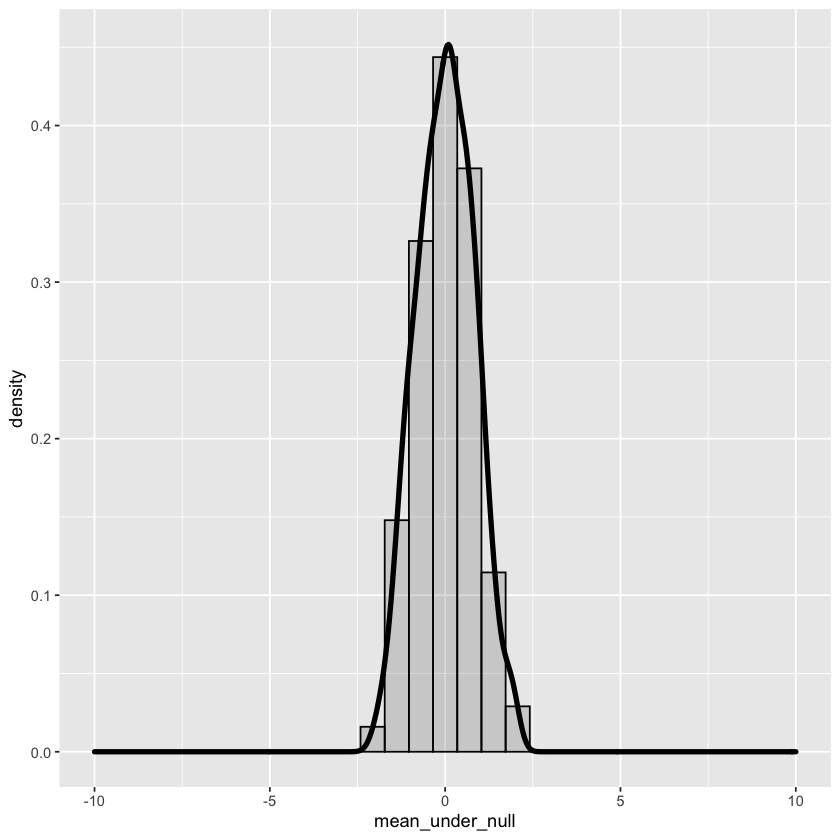

In [61]:
ggplot()+
  geom_histogram(aes(mean_under_null, y=..density..), bins =30, alpha=0.2, color="black") + 
  geom_density(aes(mean_under_null), bw=0.2, size=1.5) +
  xlim(-10, 10)


####  Q2.3. 

Calculate and plot the observed statistic on the graph you created in Q.2.2. 


In [44]:
Q2.4 
Compute the p value of the observed statistic under the null. What do you conclude about the hypotheses you enunciated in Q

ERROR: Error in parse(text = x, srcfile = src): <text>:2:9: unexpected symbol
1: Q2.4 
2: Compute the
           ^


#### Q.3 

* The proportion of the of _P. lobata_, _M. capitata_ and _P. mendrina_ at a site X are c(0.60, 0.19, 0.21).
* You surveyed site Y with different environmental conditions and obtains the following proportions for the three corals (0.61, 0.19, 0.20). Use the multinomial non-parametric hypotheses test to assess whether the proportions obtained at sites X and Y are statistically different.


Although not explicitly required, your test should cover all the steps in Q2, i.e. appropriate graph(s) when possible, test statistics, and conclusion.

In [66]:
data_x <- c(0.6, 0.19, 0.21)
data_y <- c(0.61, 0.19, 0.20)

In [67]:
processOneIteration = function(data_x, data_y){
    concat_data = c(data_x, data_y)
    len_concat_data = length(concat_data)
    
    len_data_x = length(data_x)    
    shuffled_data = sample(concat_data)
    new_data_x = shuffled_data[1:len_data_x]
    new_data_y = shuffled_data[(len_data_x+1):len_concat_data]
    mean(new_data_x) - mean(new_data_y)
    
}
processOneIteration(data_x, data_y)

[1] -0.01333333

In [68]:
mean_under_null = replicate(1000, processOneIteration(data_x, data_y))
mean(mean_under_null)

[1] -0.002326667

In [69]:
observed_value = mean(data_x) - mean(data_y)
observed_value

[1] 0

In [70]:
#pvalue
sum(mean_under_null <= observed_value) / length(mean_under_null)

[1] 0.617

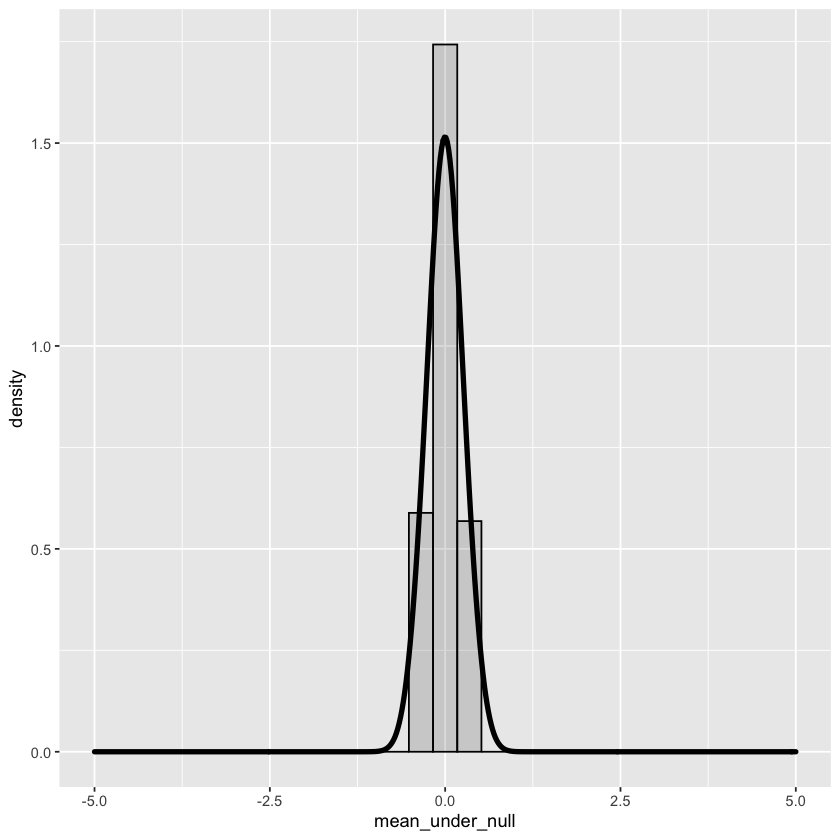

In [71]:
ggplot()+
  geom_histogram(aes(mean_under_null, y=..density..), bins =30, alpha=0.2, color="black") + 
  geom_density(aes(mean_under_null), bw=0.2, size=1.5) + 
  xlim(-5, 5)

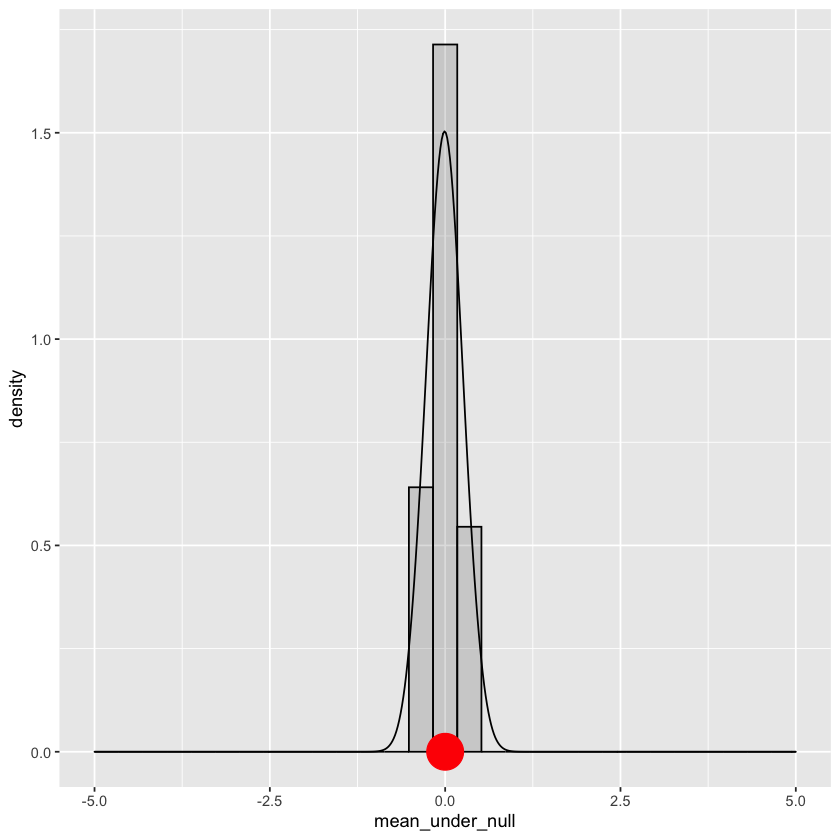

In [65]:
ggplot()+
  geom_histogram(aes(mean_under_null, y=..density..), bins =30, alpha=0.2, color="black") + 
  geom_density(aes(mean_under_null), bw=0.2, size=0.5) + 
  xlim(-5, 5) + 
  geom_point(aes(observed_value, 0), color="red", size=10)